**Table of Contents** <br>
* [1. Import libraries and datasets](#import)

* [2. Initial Exploration](#initialexploration)

* [3. Coherence Checking](#Coherence)

* [4. Split data](#Split)

* [5. Outliers Treatment](#outliers)
    * [5.1. Manual Limitation](#AutomaticLimitation)
    * [5.2. IQR](#IQR)
    * [5.3. 2-dimensional outliers](#2dim_outliers)

* [6. Missing values Treatment](#missings)

* [7. Scale the data](#scale)

* [8. Feature Engeneering](#FeatureEngeneering)

* [9. Redo outliers check](#redo-outliers)

* [10. Feature Selection](#FeatureSelection)
    * [10.1. Univariate Analysis](#univariate)
    * [10.2. Filter Methods](#filter)
        * [10.2.1 Correlation Matrix](#correlation)
        * [10.2.2 Chi-Squared](#chi-squared)
        * [10.2.3 ANOVA](#ANOVA)
    * [10.3. Wrapper methods](#warpper)
        * [10.3.1 RFE](#RFE)
        * [10.3.2 Forward Sequential Feature Selection](#forward)
        * [10.3.3 Backward Sequential Feature Selection](#backward)
    * [10.4. Embedded methods](#embedded)
        * [10.4.1 Ridge Regression](#ridge)

* [12. Check for an imbalanced dataset](#imbalanced)

* [13.  Adaptive Syntetic Oversampling](#Adaptive)

<hr>
<a class="anchor" id="import">
    
# 1. Import libraries and datasets
    
</a>

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import scipy.stats as stats
import datetime as dt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

<hr>
<a class="anchor" id="initialexploration">
    
# 2. Initial Exploration
    
</a>

In [4]:
df.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
3,103226087,22-Dec-20,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
4,103234445,24-Nov-20,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1


In [5]:
df.describe()

,Access_ID,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Buy
count,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.519728e+08,2.324232,81.205854,0.508051,34.559101,31.685869,1199.769430,0.022305,0.043181,5.963120,2.352535,3.957496,0.155216
std,2.024990e+08,3.340676,179.715545,1.279390,139.796989,44.550277,1958.276304,0.048776,0.048845,18.753626,1.715698,3.675159,0.362128
min,1.028633e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.731950e+08,0.000000,0.000000,0.000000,0.000000,7.000000,183.562500,0.000000,0.014300,0.000000,2.000000,2.000000,0.000000
50%,4.536169e+08,1.000000,7.500000,0.000000,0.000000,18.000000,599.000000,0.003200,0.025100,0.000000,2.000000,2.000000,0.000000
75%,6.259756e+08,4.000000,92.208350,0.000000,0.000000,38.000000,1470.270800,0.016800,0.050000,0.000000,2.000000,4.000000,0.000000
max,7.984440e+08,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522200,0.200000,0.200000,361.763700,13.000000,15.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

In [7]:
df.isna().sum()

Access_ID                     0
Date                          0
AccountMng_Pages              0
AccountMng_Duration           0
FAQ_Pages                     0
FAQ_Duration                  0
Product_Pages                 0
Product_Duration              0
GoogleAnalytics_BounceRate    0
GoogleAnalytics_ExitRate      0
GoogleAnalytics_PageValue     0
OS                            0
Browser                       0
Country                       0
Type_of_Traffic               0
Type_of_Visitor               0
Buy                           0
dtype: int64

In [8]:
techScapeReport = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#techScapeReport.to_notebook_iframe()

## Data Preparation

### Access_ID

<b>Unique identification of the user access to the website
* The Access_ID variable is 100% distinct across all records, hence we can use it as an index.

In [9]:
df = df.set_index(["Access_ID"])
test = test.set_index(["Access_ID"])

### Date

<b>Website visit date

* For practicality it was decided to convert the date variable to a datetime object

In [10]:
df["Date"] = pd.to_datetime(df["Date"], format = "%d-%b-%y")
test["Date"] = pd.to_datetime(test["Date"], format = "%d-%b-%y")

In [11]:
# Checking datatypes
df.dtypes

Date                          datetime64[ns]
AccountMng_Pages                       int64
AccountMng_Duration                  float64
FAQ_Pages                              int64
FAQ_Duration                         float64
Product_Pages                          int64
Product_Duration                     float64
GoogleAnalytics_BounceRate           float64
GoogleAnalytics_ExitRate             float64
GoogleAnalytics_PageValue            float64
OS                                    object
Browser                                int64
Country                               object
Type_of_Traffic                        int64
Type_of_Visitor                       object
Buy                                    int64
dtype: object

In [12]:
def conversion_type(df):

    df['AccountMng_Pages']=df['AccountMng_Pages'].astype(pd.Int32Dtype())
    df['AccountMng_Duration']=df['AccountMng_Duration'].astype(pd.Float32Dtype())
    df['FAQ_Pages']=df['FAQ_Pages'].astype(pd.Int32Dtype())
    df['FAQ_Duration']=df['FAQ_Duration'].astype(pd.Float32Dtype())
    df['Product_Pages']=df['Product_Pages'].astype(pd.Int32Dtype())
    df['Product_Duration']=df['Product_Duration'].astype(pd.Float32Dtype())
    df['GoogleAnalytics_BounceRate']=df['GoogleAnalytics_BounceRate'].astype(pd.Float32Dtype())
    df['GoogleAnalytics_ExitRate']=df['GoogleAnalytics_ExitRate'].astype(pd.Float32Dtype())
    df['GoogleAnalytics_PageValue']=df['GoogleAnalytics_PageValue'].astype(pd.Float32Dtype())
    df['OS']=df['OS'].astype(pd.StringDtype())
    df['Browser']=df['Browser'].astype(pd.Int32Dtype())
    df['Country']=df['Country'].astype(pd.StringDtype())
    df['Type_of_Traffic']=df['Type_of_Traffic'].astype(pd.Int32Dtype())
    df['Type_of_Visitor']=df['Type_of_Visitor'].astype(pd.StringDtype())
    


In [13]:
conversion_type(df)
conversion_type(test)
df['Buy']=df['Buy'].astype(pd.Int32Dtype())

In [14]:
df.dtypes

Date                          datetime64[ns]
AccountMng_Pages                       Int32
AccountMng_Duration                  Float32
FAQ_Pages                              Int32
FAQ_Duration                         Float32
Product_Pages                          Int32
Product_Duration                     Float32
GoogleAnalytics_BounceRate           Float32
GoogleAnalytics_ExitRate             Float32
GoogleAnalytics_PageValue            Float32
OS                                    string
Browser                                Int32
Country                               string
Type_of_Traffic                        Int32
Type_of_Visitor                       string
Buy                                    Int32
dtype: object

<hr>
<a class="anchor" id="Coherence">
    
# 3. Coherence Checking
    
</a>

In [15]:
# confirming that the first and last day of every month is correct
df['day']=df['Date'].dt.day
df.groupby(df['Date'].dt.month).agg(['min', 'max'])['day']

,min,max
Date,,
2,1,29
3,1,31
5,1,31
6,1,30
7,1,31
8,1,31
9,1,30
10,1,31
11,1,30


In [16]:
df[(df['AccountMng_Duration']>0) & (df['AccountMng_Pages']==0)]
df[(df['AccountMng_Duration']==0) & (df['AccountMng_Pages']>0)] 
#df[(df['FAQ_Pages']>0) & (df['FAQ_Duration']==0)]#176
#df[(df['FAQ_Pages']==0) & (df['FAQ_Duration']>0)]
#df[(df['Product_Pages']==0) & (df['Product_Pages']>0)]
#df[(df['Product_Pages']>0) & (df['Product_Pages']==0)]

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,day
Access_ID,,,,,,,,,,,,,,,,,
104650368,2020-11-05,1,0.0,0,0.0,14,1125.875,0.0,0.0429,0.0,Windows,2,Portugal,2,Returner,0,5
107375098,2020-08-07,1,0.0,3,69.0,15,352.875,0.0,0.0556,0.0,Windows,2,Spain,2,Returner,0,7
113677580,2020-11-28,1,0.0,0,0.0,39,1159.541748,0.0013,0.0313,0.0,Windows,2,Other,2,Returner,1,28
115628954,2020-05-23,2,0.0,0,0.0,0,0.0,0.2,0.2,0.0,Android,2,Portugal,6,Returner,0,23
116343256,2020-10-11,1,0.0,1,66.400002,14,668.316711,0.0143,0.0286,44.893501,iOS,2,Portugal,15,Returner,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776479996,2020-06-26,1,0.0,0,0.0,12,277.450012,0.06,0.09,0.0,MacOSX,2,Spain,13,Returner,0,26
776570163,2020-05-25,1,0.0,0,0.0,27,889.0,0.0214,0.0679,0.0,iOS,1,Spain,3,Returner,0,25
778884123,2020-05-26,1,0.0,0,0.0,90,5621.599121,0.0,0.0131,2.099,Windows,2,Italy,2,Returner,0,26


In [17]:
df=df[~(
    
        ((df['AccountMng_Duration']>0) & (df['AccountMng_Pages']==0))|
        ((df['AccountMng_Duration']==0) & (df['AccountMng_Pages']>0))|
        ((df['FAQ_Pages']>0) & (df['FAQ_Duration']==0))|
        ((df['FAQ_Pages']==0) & (df['FAQ_Duration']>0))|
        ((df['Product_Pages']==0) & (df['Product_Pages']>0))|
        ((df['Product_Pages']>0) & (df['Product_Pages']==0))|
        (df['GoogleAnalytics_BounceRate']>1)|
        (df['GoogleAnalytics_BounceRate']<0)|

        (df['GoogleAnalytics_ExitRate']>1)|
        (df['GoogleAnalytics_ExitRate']<0)|
        (df['GoogleAnalytics_BounceRate']>1)|
        (df['GoogleAnalytics_BounceRate']<0)|
        (df['Date']>dt.datetime(2020,12,31))|
        (df['Date']<dt.datetime(2020,1,31))
    
        )]

In [18]:
df[df['Date']>dt.datetime(2020,1,31)]

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,day
Access_ID,,,,,,,,,,,,,,,,,
102863333,2020-03-21,0,0.0,0,0.0,3,64.0,0.0,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0,21
103117814,2020-05-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0,20
103201891,2020-12-04,0,0.0,0,0.0,8,95.0,0.025,0.0583,0.0,Windows,4,Italy,1,Returner,0,4
103226087,2020-12-22,0,0.0,0,0.0,9,608.75,0.0,0.025,42.422501,Windows,2,United Kingdom,2,Returner,1,22
103234445,2020-11-24,0,0.0,2,386.0,36,1609.939697,0.0,0.0093,12.5033,Windows,2,Spain,3,Returner,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798279589,2020-05-08,3,159.0,2,55.5,23,1100.125,0.0,0.0111,0.0,MacOSX,2,Brazil,14,Returner,0,8
798314158,2020-07-17,6,175.100006,0,0.0,3,27.6,0.0,0.0111,0.0,Windows,10,Spain,5,New_Access,0,17
798339820,2020-03-23,0,0.0,0,0.0,27,644.0,0.0077,0.0519,0.0,MacOSX,2,France,3,Returner,0,23


In [19]:
# percentage of records removed due to inconsistency
289/9999

0.028902890289028902

<hr>
<a class="anchor" id="Split">
    
# 2. Split the data
    
</a>

In [20]:
X = df.drop("Buy", axis = 1)
y = df["Buy"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_val,y_train,y_val = train_test_split(X,y, stratify = y, train_size = 0.70,random_state = 0, shuffle = True)

### Separate Numerical from Categorical 

In [23]:
# X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
# X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)
# #For validation
# X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
# X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

In [24]:
non_num_feat=['Date', 'OS', 'Country', 'Type_of_Traffic', 'Type_of_Visitor', 'day','Browser']
X_train_num = X_train.drop(columns=non_num_feat)
X_train_cat=X_train[non_num_feat]

X_val_num = X_val.drop(columns=non_num_feat)
X_val_cat=X_val[non_num_feat]

<hr>
<a class="anchor" id="outliers">
    
# 2. Outliers Treatment
    
</a>

<b>Using drop_outliers to drop unwanted outliers from df </b>
* Having analysed the distrbution of this variable, it became apparent that there may be outliers.
* It was decided to drop the outliers and then later on reintroduce them if, as a result, the accuracy of the model suffered. Dropped ___ records (7.7%).

<hr>
<a class="anchor" id="AutomaticLimitation">
    
## Manual Limitation
    
</a>

Text(0.5, 0.98, "Numeric Variables' Histograms")

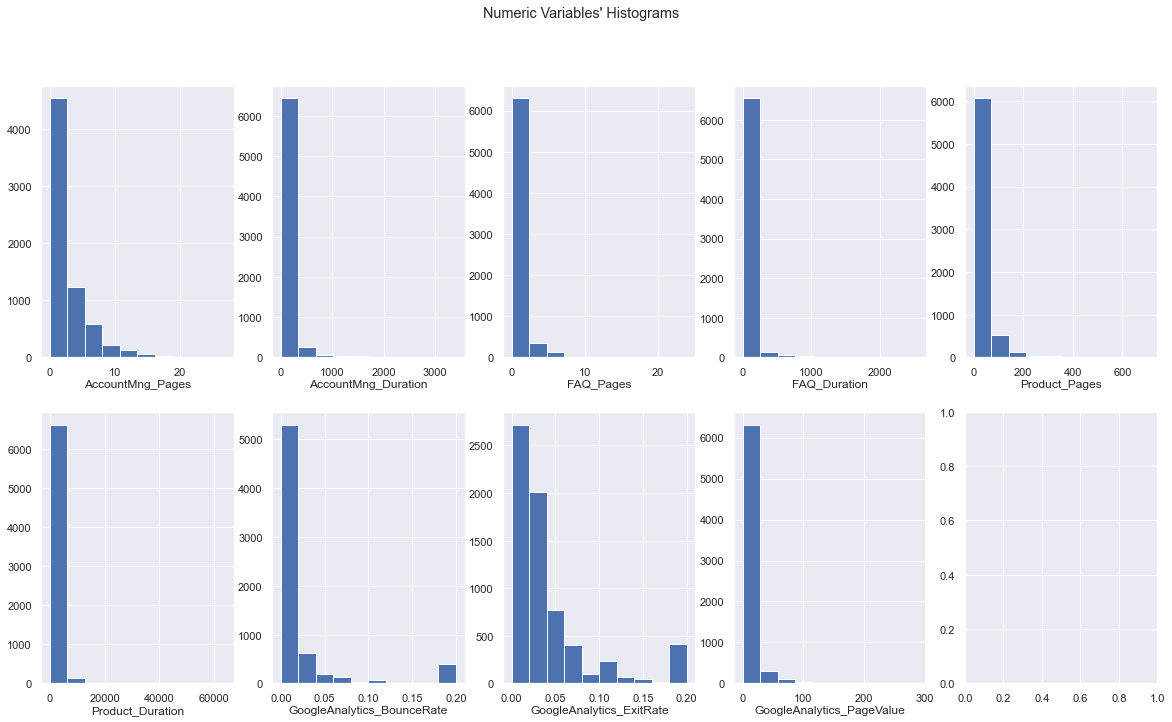

In [25]:
# All Numeric Variables' Histograms in one figure
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
%matplotlib inline


sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_num.columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), (X_train_num.columns.tolist())): # Notice the zip() function and flatten() method
    ax.hist(X_train_num[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

#plt.savefig("teste.png")

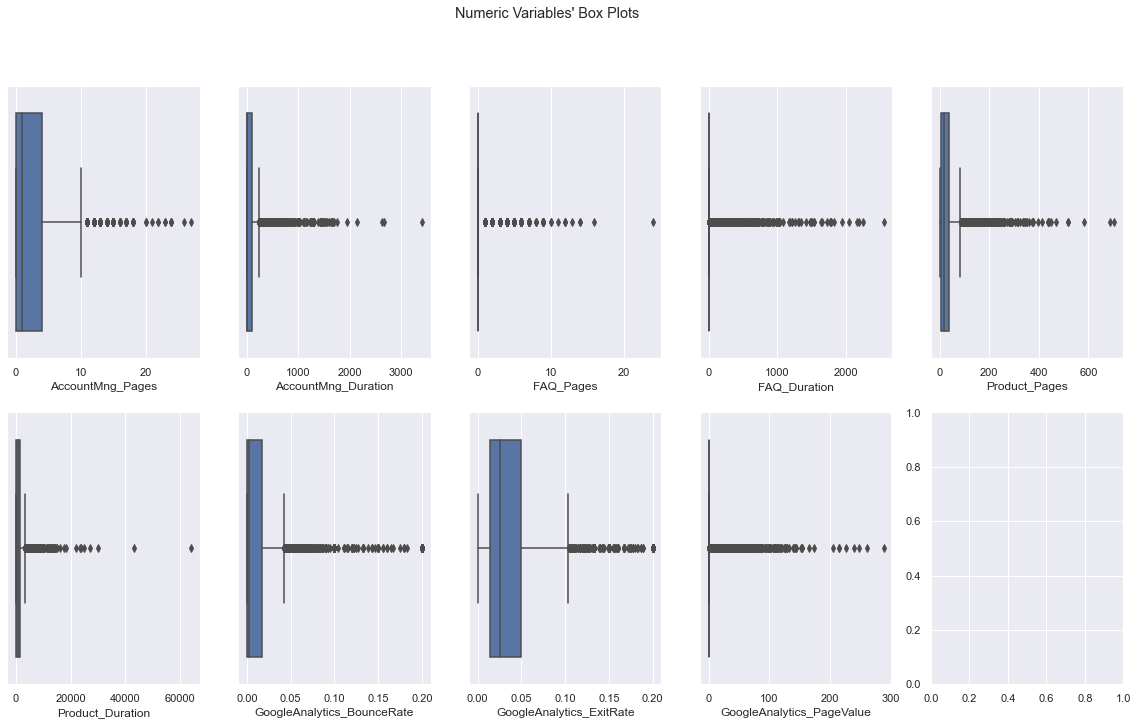

In [26]:
# All Numeric Variables' Box Plots in one figure
%matplotlib inline
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_num.columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), X_train_num.columns.tolist()): # Notice the zip() function and flatten() method
    sns.boxplot(x=X_train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [27]:
(len(X_train)-6388 )/len(X_train)

0.060173606002648226

In [28]:
(6797-6708)/6797 

0.013094012064145948

In [29]:
len(X_train)

6797

In [30]:
filters1 = (
         (X_train['AccountMng_Pages']<=19)
         &
         (X_train['AccountMng_Duration']<=2000)
         &
         (X_train['FAQ_Pages']<=6)
         &
         (X_train['FAQ_Duration']<=1100)
         &
         (X_train['Product_Pages']<=400)
         &
         (X_train['Product_Duration']<=15000)
         &
         (X_train['GoogleAnalytics_BounceRate']<=0.20)
         &
         (X_train['GoogleAnalytics_ExitRate']<=0.20)
         &
         (X_train['GoogleAnalytics_PageValue']<=165)
         )

teste=X_train[filters1]
teste

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,day
Access_ID,,,,,,,,,,,,,,,,
746917175,2020-09-19,4,77.099998,0,0.0,4,41.700001,0.0,0.0286,0.0,Windows,2,Brazil,6,Returner,19
565616559,2020-12-16,0,0.0,4,8.0,66,1514.836304,0.0229,0.0449,0.0,Windows,2,Other,2,Returner,16
276412217,2020-12-30,7,131.833298,0,0.0,63,2074.611084,0.0108,0.02,0.0,MacOSX,2,Spain,10,Returner,30
361837847,2020-05-20,0,0.0,0,0.0,2,121.0,0.0,0.05,0.0,MacOSX,2,Portugal,3,Returner,20
568629484,2020-03-20,0,0.0,0,0.0,21,1003.0,0.0,0.0083,0.0,Windows,4,Portugal,1,Returner,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789752052,2020-07-02,5,109.599998,1,3.0,29,1980.266724,0.0061,0.0263,0.0,Windows,2,Portugal,4,Returner,2
581081929,2020-03-22,0,0.0,0,0.0,12,169.300003,0.0,0.0167,0.0,Windows,2,Spain,2,Returner,22
283517225,2020-12-25,5,97.0,0,0.0,53,3372.748291,0.0038,0.0025,0.0,Windows,2,Italy,2,Returner,25


In [31]:
#def manual_filter(df):
def filter_outlier(df):
    filters1 = (
         (df['AccountMng_Pages']<=19)
         &
         (df['AccountMng_Duration']<=2000)
         &
         (df['FAQ_Pages']<=6)
         &
         (df['FAQ_Duration']<=1100)
         &
         (df['Product_Pages']<=400)
         &
         (df['Product_Duration']<=15000)
         &
         (df['GoogleAnalytics_BounceRate']<=0.20)
         &
         (df['GoogleAnalytics_ExitRate']<=0.20)
         &
         (df['GoogleAnalytics_PageValue']<=165)
         )
    return df[filters1],df[~filters1].index

In [32]:
index_out_train=filter_outlier(X_train)[1].tolist()

In [33]:
index_out_val=filter_outlier(X_val)[1].tolist()

In [34]:
X_val_no_out=filter_outlier(X_val)[0]

In [35]:
X_train_no_out=filter_outlier(X_train)[0]

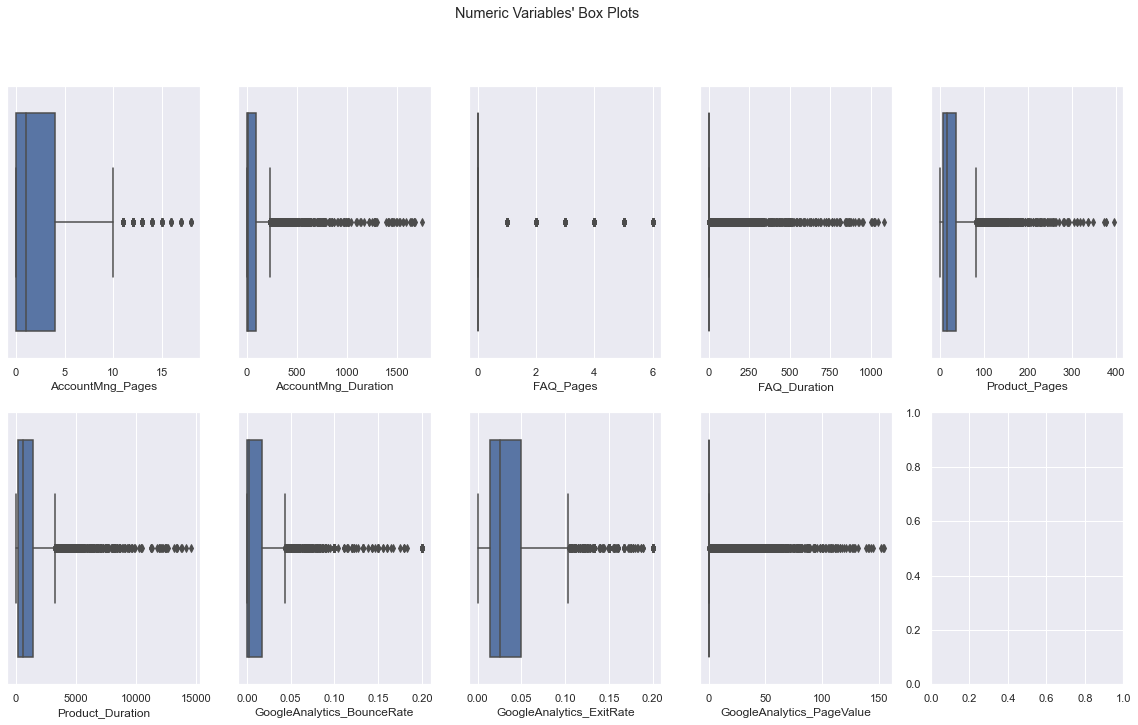

In [36]:
# All Numeric Variables' Box Plots in one figure
%matplotlib inline
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_no_out.drop(columns=non_num_feat, axis=1).columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), teste.drop(columns=non_num_feat, axis=1).columns.tolist()): # Notice the zip() function and flatten() method
    sns.boxplot(x=(X_train_no_out[feat]), ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [37]:
# remove outliers records from y_train
y_train_df=pd.DataFrame(y_train)
y_train_df=y_train_df[~y_train_df.index.isin(index_out_train)]

In [38]:
# remove outliers records from y_val
y_val_df=pd.DataFrame(y_val)
y_val_df=y_val_df[~y_val_df.index.isin(index_out_val)]

In [39]:
X_train_no_out_num = X_train_no_out.drop(columns=non_num_feat)
X_train_no_out_cat=X_train_no_out[non_num_feat]

<hr>
<a class="anchor" id="2dim_outliers">
    
## Multi-dimentional outliers
    
</a>

KeyboardInterrupt: 

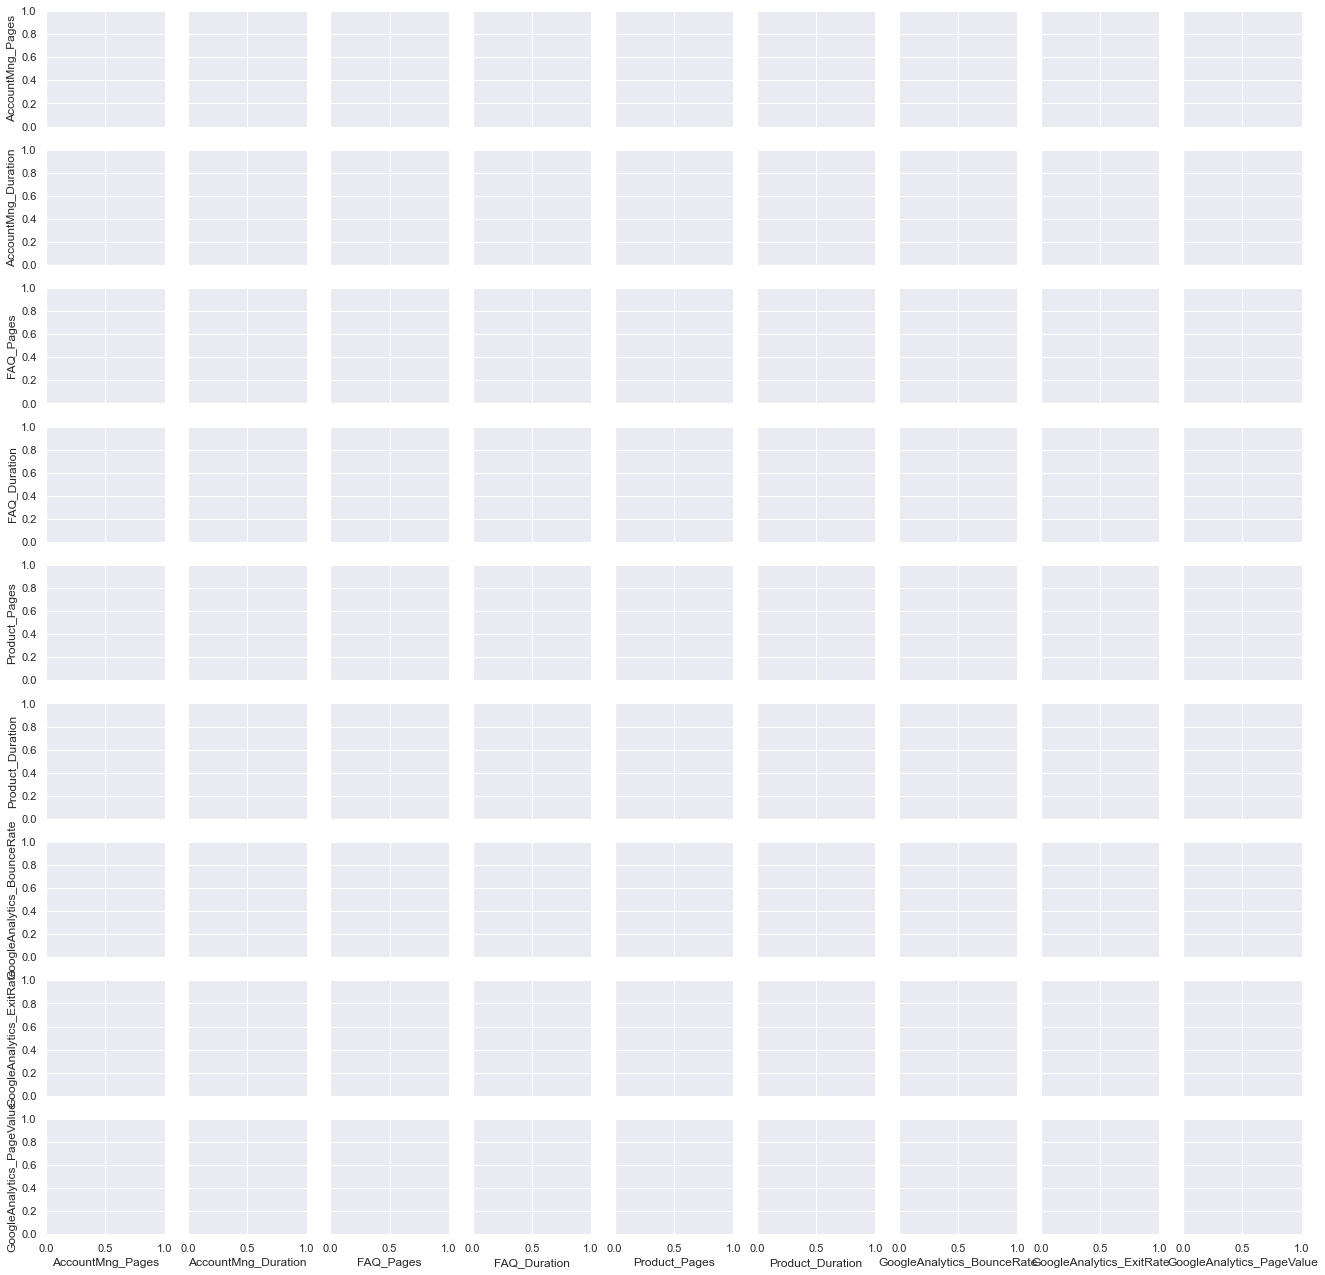

In [40]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(X_train_no_out_num, diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'pairwise_relationship_of_numerical_variables.png'), dpi=200)
plt.show()

<hr>
<a class="anchor" id="FeatureEngeneering">
    
# Feature Engineering
    
</a>

In [43]:
def feat_eng(df):

    df['month']=df['Date'].dt.month
    df['avg_duration_account'] = np.where(
        df['AccountMng_Pages']==0, 0,np.divide(df['AccountMng_Duration'],df['AccountMng_Pages'])) 

    df['avg_duration_FAQ'] = np.where(
        df['FAQ_Pages']==0, 0,np.divide(df['FAQ_Duration'],df['FAQ_Pages'])) 

    df['avg_duration_product'] = np.where(
        df['Product_Pages']==0, 0,np.divide(df['Product_Duration'],df['Product_Pages'])) 
   

    df['log_AccountMng_Duration']=np.log10(df['AccountMng_Duration']+1)
    df['log_AccountMng_Pages']=np.log10(df['AccountMng_Pages']+1)
    df['log_FAQ_Duration']=np.log10(df['FAQ_Duration']+1)
    df['log_FAQ_Pages']=np.log10(df['FAQ_Pages']+1)
    df['log_Product_Duration']=np.log10(df['Product_Duration']+1)
    df['log_Product_Pages']=np.log10(df['Product_Pages']+1)
    df['log_BounceRate']=np.log10(df['GoogleAnalytics_BounceRate']+1)
    df['log_ExitRate']=np.log10(df['GoogleAnalytics_ExitRate']+1)
    df['log_PageValue']=np.log10(df['GoogleAnalytics_PageValue']+1)
    df['during_covid']=np.where(df['month']<=3,0,1) 

In [44]:
feat_eng(X_train_no_out)
feat_eng(X_val_no_out)
feat_eng(test)

In [45]:
X_val_no_out

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,...,log_AccountMng_Duration,log_AccountMng_Pages,log_FAQ_Duration,log_FAQ_Pages,log_Product_Duration,log_Product_Pages,log_BounceRate,log_ExitRate,log_PageValue,during_covid
Access_ID,,,,,,,,,,,,,,,,,,,,,
609666640,2020-11-08,0,0.0,0,0.0,13,524.0,0.0,0.0167,45.464298,...,0.0,0.0,0.0,0.0,2.720159,1.146128,0.0,0.007193,1.667119,1
598178285,2020-03-10,0,0.0,0,0.0,9,244.5,0.0,0.0111,0.0,...,0.0,0.0,0.0,0.0,2.390052,1.0,0.0,0.004794,0.0,0
535781019,2020-11-29,7,78.357101,3,210.666702,309,12158.196289,0.0076,0.0255,0.0,...,1.899586,0.90309,2.325653,0.60206,4.084905,2.491362,0.003288,0.010936,0.0,1
436628688,2020-03-22,0,0.0,0,0.0,37,1229.766724,0.0054,0.0144,0.0,...,0.0,0.0,0.0,0.0,3.090176,1.579784,0.002339,0.006209,0.0,0
707978633,2020-11-24,0,0.0,4,122.5,330,11208.355469,0.008,0.0229,0.0,...,0.0,0.0,2.091667,0.69897,4.049581,2.519828,0.003461,0.009833,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119444824,2020-05-29,2,738.0,0,0.0,26,1840.666748,0.008,0.042,0.0,...,2.868644,0.477121,0.0,0.0,3.265211,1.431364,0.003461,0.017868,0.0,1
294996079,2020-11-18,3,155.699997,0,0.0,18,595.0,0.0,0.0105,0.0,...,2.195069,0.60206,0.0,0.0,2.775246,1.278754,0.0,0.004536,0.0,1
442079450,2020-03-05,0,0.0,0,0.0,31,688.166687,0.0,0.0194,0.0,...,0.0,0.0,0.0,0.0,2.838324,1.50515,0.0,0.008345,0.0,0


## One Hot_encoding

#### Train dataset

In [46]:
ohc_feat_list = ['Browser','Country','OS','Type_of_Visitor','Type_of_Traffic']

In [47]:
from sklearn.preprocessing import OneHotEncoder
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(X_train_no_out[ohc_feat_list])
ohc_feat_names = ohc.get_feature_names()
ohc_X_train = pd.DataFrame(ohc_feat, index=X_train_no_out.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_X_train.columns

Index(['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x0_10',
       'x0_11', 'x0_12', 'x0_13', 'x1_Brazil', 'x1_France', 'x1_Germany',
       'x1_Italy', 'x1_Other', 'x1_Portugal', 'x1_Spain', 'x1_Switzerland',
       'x1_United Kingdom', 'x2_Android', 'x2_Chrome OS', 'x2_Fedora',
       'x2_MacOSX', 'x2_Other', 'x2_Ubuntu', 'x2_Windows', 'x2_iOS',
       'x3_New_Access', 'x3_Other', 'x3_Returner', 'x4_1', 'x4_2', 'x4_3',
       'x4_4', 'x4_5', 'x4_6', 'x4_7', 'x4_8', 'x4_9', 'x4_10', 'x4_11',
       'x4_12', 'x4_13', 'x4_14', 'x4_15'],
      dtype='object')

In [48]:
ohc_X_train.rename(columns={'x0_1':'browser1','x0_2':'browser2','x0_3':'browser3','x0_4':'browser4','x0_5':'browser5','x0_6':'browser6','x0_7':'browser7','x0_8':'browser8','x0_9':'browser9','x0_10':'browser10','x0_11':'browser11','x0_12':'browser12','x0_13':'browser13','x4_1':'traffic1','x4_2':'traffic2', 'x4_3':'traffic3', 'x4_4':'traffic4', 'x4_5':'traffic5', 'x4_6':'traffic6', 'x4_7':'traffic7', 'x4_8':'traffic8',
       'x4_9':'traffic9', 'x4_10':'traffic10', 'x4_11':'traffic11', 'x4_12':'traffic12', 'x4_13':'traffic13', 'x4_14':'traffic14', 'x4_15':'traffic15'},inplace=True)

In [49]:
X_train_eng = X_train_no_out.join(ohc_X_train)

In [50]:
X_train_eng.columns

Index(['Date', 'AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages',
       'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor', 'day', 'month',
       'avg_duration_account', 'avg_duration_FAQ', 'avg_duration_product',
       'log_AccountMng_Duration', 'log_AccountMng_Pages', 'log_FAQ_Duration',
       'log_FAQ_Pages', 'log_Product_Duration', 'log_Product_Pages',
       'log_BounceRate', 'log_ExitRate', 'log_PageValue', 'during_covid',
       'browser1', 'browser2', 'browser3', 'browser4', 'browser5', 'browser6',
       'browser7', 'browser8', 'browser10', 'browser11', 'browser12',
       'browser13', 'x1_Brazil', 'x1_France', 'x1_Germany', 'x1_Italy',
       'x1_Other', 'x1_Portugal', 'x1_Spain', 'x1_Switzerland',
       'x1_United Kingdom', 'x2_Android', 'x2_Chrome OS', 'x2_Fedora',
       'x2_MacOSX', 'x2_Oth

#### Test dataset

In [51]:
ohc_feat_test = ohc.fit_transform(test[ohc_feat_list])
ohc_feat_test_names = ohc.get_feature_names()
ohc_X_test = pd.DataFrame(ohc_feat_test, index = test.index, columns = ohc_feat_test_names)  # Why the index=df_ohc.index?
ohc_X_test.columns

Index(['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x0_9',
       'x0_10', 'x0_11', 'x0_12', 'x0_13', 'x1_Brazil', 'x1_France',
       'x1_Germany', 'x1_Italy', 'x1_Other', 'x1_Portugal', 'x1_Spain',
       'x1_Switzerland', 'x1_United Kingdom', 'x2_Android', 'x2_Chrome OS',
       'x2_Fedora', 'x2_MacOSX', 'x2_Other', 'x2_Ubuntu', 'x2_Windows',
       'x2_iOS', 'x3_New_Access', 'x3_Other', 'x3_Returner', 'x4_1', 'x4_2',
       'x4_3', 'x4_4', 'x4_5', 'x4_6', 'x4_7', 'x4_8', 'x4_9', 'x4_10',
       'x4_11', 'x4_12', 'x4_13', 'x4_14', 'x4_15'],
      dtype='object')

In [52]:
ohc_X_test.rename(columns={'x0_1':'browser1','x0_2':'browser2','x0_3':'browser3','x0_4':'browser4','x0_5':'browser5','x0_6':'browser6','x0_7':'browser7','x0_8':'browser8','x0_9':'browser9','x0_10':'browser10','x0_11':'browser11','x0_12':'browser12','x0_13':'browser13','x4_1':'traffic1','x4_2':'traffic2', 'x4_3':'traffic3', 'x4_4':'traffic4', 'x4_5':'traffic5', 'x4_6':'traffic6', 'x4_7':'traffic7', 'x4_8':'traffic8',
       'x4_9':'traffic9', 'x4_10':'traffic10', 'x4_11':'traffic11', 'x4_12':'traffic12', 'x4_13':'traffic13', 'x4_14':'traffic14', 'x4_15':'traffic15'},inplace=True)

In [53]:
X_test_eng = test.join(ohc_X_test)

In [54]:
X_test_eng.columns

Index(['Date', 'AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages',
       'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor', 'month', 'avg_duration_account',
       'avg_duration_FAQ', 'avg_duration_product', 'log_AccountMng_Duration',
       'log_AccountMng_Pages', 'log_FAQ_Duration', 'log_FAQ_Pages',
       'log_Product_Duration', 'log_Product_Pages', 'log_BounceRate',
       'log_ExitRate', 'log_PageValue', 'during_covid', 'browser1', 'browser2',
       'browser3', 'browser4', 'browser5', 'browser6', 'browser7', 'browser8',
       'browser9', 'browser10', 'browser11', 'browser12', 'browser13',
       'x1_Brazil', 'x1_France', 'x1_Germany', 'x1_Italy', 'x1_Other',
       'x1_Portugal', 'x1_Spain', 'x1_Switzerland', 'x1_United Kingdom',
       'x2_Android', 'x2_Chrome OS', 'x2_Fedora', 'x2_MacOSX', 'x2_Other

#### Validation dataset

In [55]:
ohc_feat_val = ohc.fit_transform(X_val_no_out[ohc_feat_list])
ohc_feat_val_names = ohc.get_feature_names()
ohc_X_val = pd.DataFrame(ohc_feat_val, index = X_val_no_out.index, columns = ohc_feat_val_names)  # Why the index=df_ohc.index?
ohc_X_val.columns

Index(['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x0_10',
       'x0_12', 'x0_13', 'x1_Brazil', 'x1_France', 'x1_Germany', 'x1_Italy',
       'x1_Other', 'x1_Portugal', 'x1_Spain', 'x1_Switzerland',
       'x1_United Kingdom', 'x2_Android', 'x2_Chrome OS', 'x2_MacOSX',
       'x2_Other', 'x2_Ubuntu', 'x2_Windows', 'x2_iOS', 'x3_New_Access',
       'x3_Other', 'x3_Returner', 'x4_1', 'x4_2', 'x4_3', 'x4_4', 'x4_5',
       'x4_6', 'x4_7', 'x4_8', 'x4_9', 'x4_10', 'x4_11', 'x4_12', 'x4_13',
       'x4_14', 'x4_15'],
      dtype='object')

In [56]:
ohc_X_val.rename(columns={'x0_1':'browser1','x0_2':'browser2','x0_3':'browser3','x0_4':'browser4','x0_5':'browser5','x0_6':'browser6','x0_7':'browser7','x0_8':'browser8','x0_9':'browser9','x0_10':'browser10','x0_11':'browser11','x0_12':'browser12','x0_13':'browser13','x4_1':'traffic1','x4_2':'traffic2', 'x4_3':'traffic3', 'x4_4':'traffic4', 'x4_5':'traffic5', 'x4_6':'traffic6', 'x4_7':'traffic7', 'x4_8':'traffic8',
       'x4_9':'traffic9', 'x4_10':'traffic10', 'x4_11':'traffic11', 'x4_12':'traffic12', 'x4_13':'traffic13', 'x4_14':'traffic14', 'x4_15':'traffic15'},inplace=True)

In [57]:
X_val_eng = X_val_no_out.join(ohc_X_val)

In [58]:
binary_list=ohc_X_train.columns.to_list()+['during_covid']

In [59]:
non_num_feat1=non_num_feat+binary_list+['month']

In [60]:
X_train_eng_num = X_train_eng.drop(columns=non_num_feat1)

In [61]:
X_train_eng_num.columns

Index(['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration',
       'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue',
       'avg_duration_account', 'avg_duration_FAQ', 'avg_duration_product',
       'log_AccountMng_Duration', 'log_AccountMng_Pages', 'log_FAQ_Duration',
       'log_FAQ_Pages', 'log_Product_Duration', 'log_Product_Pages',
       'log_BounceRate', 'log_ExitRate', 'log_PageValue'],
      dtype='object')

In [62]:
non_num_feat_alter=non_num_feat1.copy()
non_num_feat_alter.remove('browser11')
non_num_feat_alter.remove('x2_Fedora')

In [63]:
X_val_eng_num = X_val_eng.drop(columns=non_num_feat_alter,axis=1)

<hr>
<a class="anchor" id="scale">
    
# Scaling Data
    
</a>

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train_eng_num)
X_train_eng_num_scaled_min = scaler.transform(X_train_eng_num) 

# Convert the array to a pandas dataframe
X_train_eng[X_train_eng_num.columns] = pd.DataFrame(X_train_eng_num_scaled_min, columns = X_train_eng_num.columns).set_index(X_train_eng_num.index)

X_train_eng.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,6708.0,0.123708,0.175042,0.0,0.000000,0.055556,0.222222,1.0
AccountMng_Duration,6708.0,0.044413,0.093789,0.0,0.000000,0.004569,0.051969,1.0
FAQ_Pages,6708.0,0.073395,0.180070,0.0,0.000000,0.000000,0.000000,1.0
FAQ_Duration,6708.0,0.025269,0.091353,0.0,0.000000,0.000000,0.000000,1.0
Product_Pages,6708.0,0.075535,0.097142,0.0,0.017632,0.044081,0.093199,1.0
...,...,...,...,...,...,...,...,...
traffic11,6708.0,0.020572,0.141959,0.0,0.000000,0.000000,0.000000,1.0
traffic12,6708.0,0.003429,0.058459,0.0,0.000000,0.000000,0.000000,1.0
traffic13,6708.0,0.060823,0.239023,0.0,0.000000,0.000000,0.000000,1.0
traffic14,6708.0,0.002236,0.047238,0.0,0.000000,0.000000,0.000000,1.0


In [65]:
X_val_num_scaled = scaler.transform(X_val_eng_num)
X_val_eng[X_val_eng_num.columns] = pd.DataFrame(X_val_num_scaled, columns = X_val_eng_num.columns).set_index(X_val_eng_num.index)
X_val_eng.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,2862.0,0.125126,0.181819,0.0,0.000000,0.055556,0.222222,1.055556
AccountMng_Duration,2862.0,0.043070,0.089494,0.0,0.000000,0.002855,0.050220,1.111335
FAQ_Pages,2862.0,0.067028,0.165060,0.0,0.000000,0.000000,0.000000,1.000000
FAQ_Duration,2862.0,0.023581,0.086747,0.0,0.000000,0.000000,0.000000,0.993672
Product_Pages,2862.0,0.074413,0.095533,0.0,0.017632,0.042821,0.090680,0.871537
...,...,...,...,...,...,...,...,...
traffic11,2862.0,0.020615,0.142116,0.0,0.000000,0.000000,0.000000,1.000000
traffic12,2862.0,0.006289,0.079069,0.0,0.000000,0.000000,0.000000,1.000000
traffic13,2862.0,0.058700,0.235104,0.0,0.000000,0.000000,0.000000,1.000000
traffic14,2862.0,0.003494,0.059018,0.0,0.000000,0.000000,0.000000,1.000000


In [66]:
# from sklearn.preprocessing import RobustScaler

# transformer = RobustScaler().fit(X_train_no_out_num)

# X_train_num_robust= pd.DataFrame(transformer.fit_transform(X_train_no_out_num))
# X_train_num_robust.columns=X_train_no_out_num.columns.values

In [67]:
# X_val_num_robust= pd.DataFrame(transformer.fit_transform(X_val_no_out_num))


# X_val_num_robust.columns=X_val_no_out_num.columns.values

In [68]:
# X_train_num_robust.describe().T

<hr>
<a class="anchor" id="redo-outliers">
    
# Redo outliers check
    
</a>

In [70]:
# All Numeric Variables' Box Plots in one figure
%matplotlib inline
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_eng[metric_feat].columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), X_train_eng[metric_feat].columns.tolist()): # Notice the zip() function and flatten() method
    sns.boxplot(x=X_train_eng[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

NameError: name 'metric_feat' is not defined


<a class="anchor" id="FeatureSelection">
    
# Feature Selection
    
</a>


<a class="anchor" id="univariate">
    
## Univariate analysis
    
</a>

In [71]:
X_train_eng.var()

AccountMng_Pages       0.030640
AccountMng_Duration    0.008796
FAQ_Pages              0.032425
FAQ_Duration           0.008345
Product_Pages          0.009437
                         ...   
traffic11              0.020152
traffic12              0.003417
traffic13              0.057132
traffic14              0.002231
traffic15              0.015843
Length: 73, dtype: float64

None of the variables is univariate so we don't have to drop any variable, at least according with this method

In [72]:
# https://scikit-learn.org/stable/modules/feature_selection.html 
pd.DataFrame(X_train_eng[binary_list].var())

,0
browser1,0.161041
browser2,0.228472
browser3,0.007252
browser4,0.057263
browser5,0.034088
browser6,0.012513
browser7,0.004896
browser8,0.011057
browser10,0.012658
browser11,0.000447


In [73]:
0.8*(1-0.8)

0.15999999999999998

<hr>
<a class="anchor" id="filter">
    
## Filter Methods
    
</a>

<hr>
<a class="anchor" id="correlation">
    
### Correlation Matrix
    
</a>

In [74]:
y_train_no_out=y_train_df.squeeze()

In [75]:
metric_feat=X_train_eng_num.columns.to_list()

In [76]:
# Dataframe with the dependent and independent variables
all_train_num = X_train_eng[metric_feat].join(y_train)

In [77]:
# function to create a heatmat
def cor_heatmap(cor):
    plt.figure(figsize=(20,20))
    matrix = np.triu(cor)

    # using the upper triangle matrix as mask 
    sns.heatmap(data = cor, annot = True, fmt='.1', mask=matrix,cmap=sns.diverging_palette(20, 220, n=200))   
    plt.show()

In [78]:
cor_spearman = all_train_num.corr(method ='spearman')

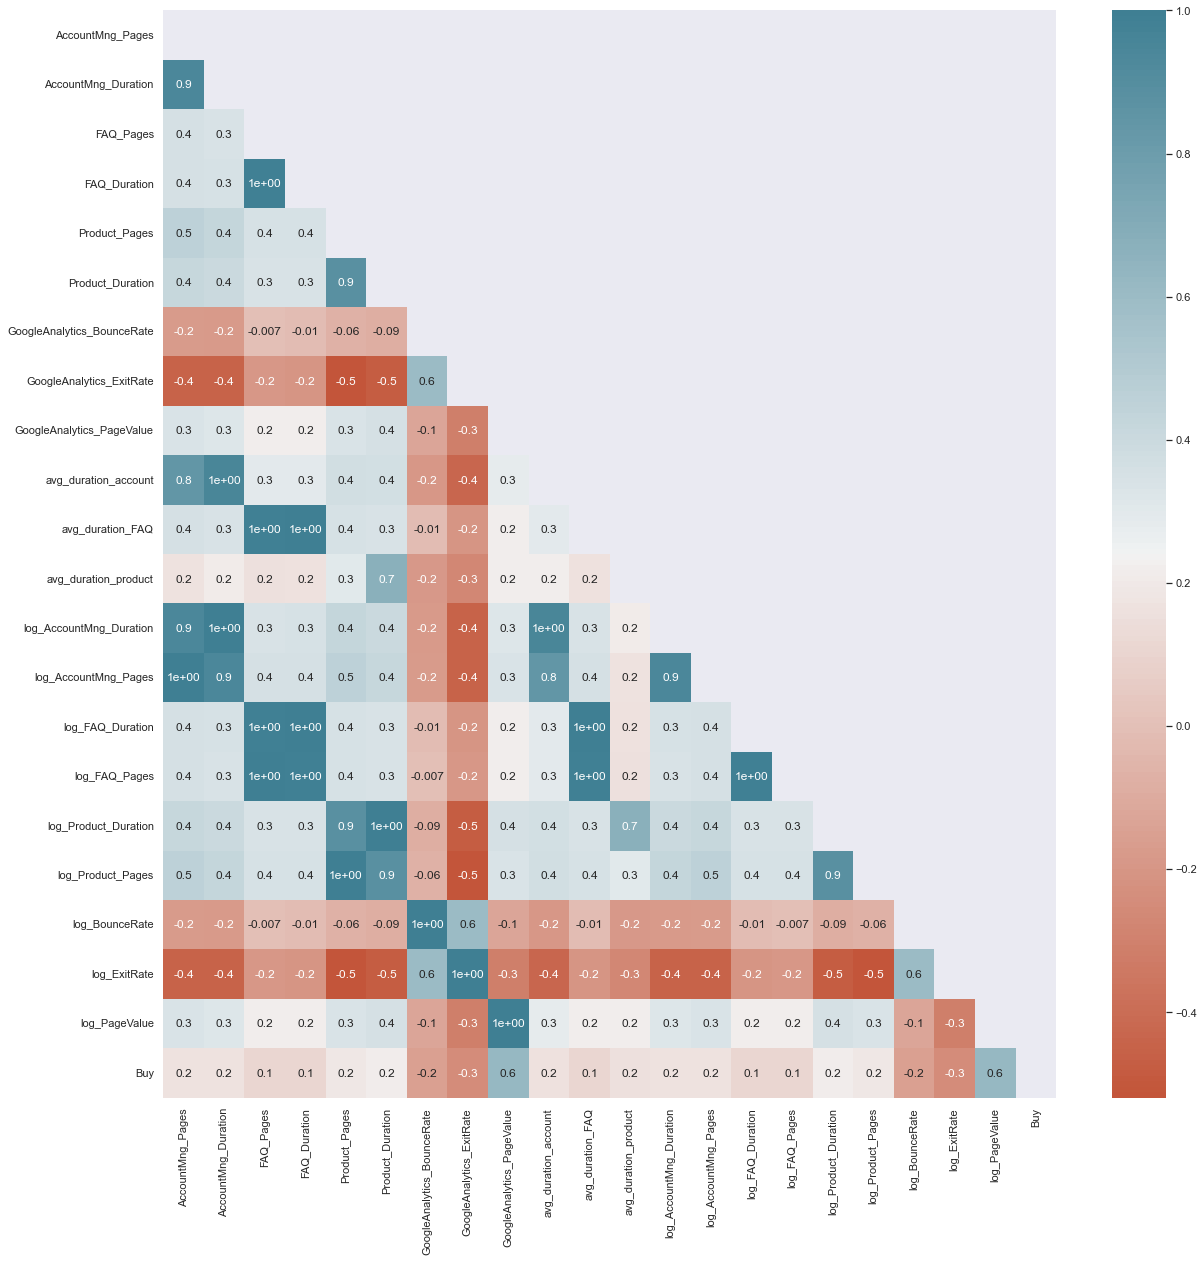

In [79]:
cor_heatmap(cor_spearman)

GoogleAnalytics_PageValue and log_PageValue are highly correlated with the target variable so we should keep them one of them since they are redundant.

- There are pairs of variables highly correlated, namely:
    - avg_duration_account vs AccountMng_Pages (0.9) <br>
    - avg_duration_account vs AccountMng_Duration (1) <br>
    - log_AccountMng_Duration vs AccountMng_Pages (0.9) <br>
    - log_FAQ_Duration vs FAQ_Pages (1) <br>
    - log_FAQ_Pages vs FAQ_Duration (1) <br>
    - log_Product_Duration vs Product_Pages (0.9) <br>
    - log_Product_Pages vs Product_Duration (0.9) <br>
    - log_BounceRate vs GoogleAnalytics_ExitRate (0.5) <br>
    - log_ExitRate vs GoogleAnalytics_BounceRate (0.9) <br>

<hr>
<a class="anchor" id="chi-squared">
    
### Chi-Squared
    
</a>

In [80]:
X_chisquare=X_train_eng[non_num_feat1]

In [81]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [82]:
for var in X_chisquare:
    TestIndependence(X_chisquare[var],y_train_no_out, var)

Date is IMPORTANT for Prediction
OS is IMPORTANT for Prediction
Country is NOT an important predictor. (Discard Country from model)
Type_of_Traffic is IMPORTANT for Prediction
Type_of_Visitor is IMPORTANT for Prediction
day is NOT an important predictor. (Discard day from model)
Browser is NOT an important predictor. (Discard Browser from model)
browser1 is NOT an important predictor. (Discard browser1 from model)
browser2 is NOT an important predictor. (Discard browser2 from model)
browser3 is NOT an important predictor. (Discard browser3 from model)
browser4 is NOT an important predictor. (Discard browser4 from model)
browser5 is NOT an important predictor. (Discard browser5 from model)
browser6 is NOT an important predictor. (Discard browser6 from model)
browser7 is NOT an important predictor. (Discard browser7 from model)
browser8 is NOT an important predictor. (Discard browser8 from model)
browser10 is NOT an important predictor. (Discard browser10 from model)
browser11 is NOT an 

<hr>
<a class="anchor" id="ANOVA">
    
### ANOVA
    
</a>

In [83]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest


In [84]:
def select_features(X_train, y_train):
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(X_train, y_train)
    
    X_train_fs = pd.DataFrame(fs.transform(X_train))
    
    #X_test_fs = fs.transform(X_test)
    return X_train_fs, fs


In [85]:
select_features(X_train_eng[metric_feat], y_train_df)

(            0         1         2         3         4         5       6   \
 0     0.222222  0.044031  0.000000  0.000000  0.010076  0.002861  0.0000   
 1     0.000000  0.000000  0.666667  0.007409  0.166247  0.103919  0.1145   
 2     0.388889  0.075288  0.000000  0.000000  0.158690  0.142320  0.0540   
 3     0.000000  0.000000  0.000000  0.000000  0.005038  0.008301  0.0000   
 4     0.000000  0.000000  0.000000  0.000000  0.052897  0.068807  0.0000   
 ...        ...       ...       ...       ...       ...       ...     ...   
 6703  0.277778  0.062591  0.166667  0.002778  0.073048  0.135848  0.0305   
 6704  0.000000  0.000000  0.000000  0.000000  0.030227  0.011614  0.0000   
 6705  0.277778  0.055395  0.000000  0.000000  0.133501  0.231373  0.0190   
 6706  0.000000  0.000000  0.000000  0.000000  0.068010  0.072581  0.1345   
 6707  0.388889  0.089946  0.166667  0.021300  0.105793  0.240310  0.0255   
 
           7         8         9   ...        11        12        13      

In [86]:
X_train_fs, fs =select_features(X_train_eng[metric_feat], y_train_df)
dict_feat={}

for i in range(len(fs.scores_)):
    dict_feat[X_train_eng[metric_feat].columns[i]]=fs.scores_[i]
    
dict(sorted(dict_feat.items(), key=lambda item: item[1]))
 

{'avg_duration_product': 13.567982135182847,
 'avg_duration_FAQ': 30.227001126384366,
 'avg_duration_account': 33.4595220684583,
 'FAQ_Duration': 59.55531112123382,
 'AccountMng_Duration': 65.01682511233422,
 'FAQ_Pages': 65.15374376774147,
 'log_FAQ_Pages': 74.00793749172753,
 'log_FAQ_Duration': 84.82792834635447,
 'AccountMng_Pages': 140.5764764181631,
 'GoogleAnalytics_BounceRate': 161.76232765638417,
 'log_BounceRate': 166.4786802715826,
 'Product_Pages': 177.09464392905335,
 'log_AccountMng_Pages': 183.70489179788285,
 'log_AccountMng_Duration': 195.6991634583482,
 'Product_Duration': 197.86796550915474,
 'log_Product_Pages': 265.6967525787562,
 'log_Product_Duration': 277.6244126397036,
 'GoogleAnalytics_ExitRate': 299.9746123172136,
 'log_ExitRate': 310.99898544893546,
 'GoogleAnalytics_PageValue': 2623.180213898888,
 'log_PageValue': 4372.981880100837}

<hr>
<a class="anchor" id="wrapper">
    
## Wrapper Methods
    
</a>

<hr>
<a class="anchor" id="RFE">
    
### RFE
    
</a>

Optimal number of features : 38
Max accuracy: 0.8960924016265638


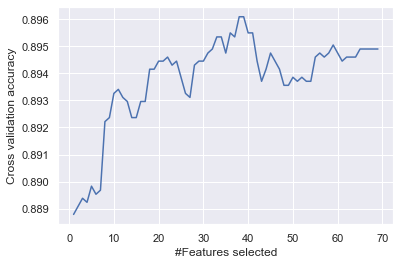

AttributeError: 'RFECV' object has no attribute 'cv_results_'

In [112]:
#Doing the same using RFECV and KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from operator import itemgetter
from sklearn.linear_model import LogisticRegression

min_features_to_select = 1  
rfecv = RFECV(
    estimator=LogisticRegression(),
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select= min_features_to_select
)
rfecv.fit(X_train_eng[metric_feat+binary_list], y_train_df)

print(f"Optimal number of features : {rfecv.n_features_}")
print(f"Max accuracy: {np.amax(rfecv.grid_scores_)}" )

# Plot features vs validation scores
plt.figure()
plt.xlabel("#Features selected")
plt.ylabel("Cross validation accuracy")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()
# update version
rfecv.cv_results_

In [ ]:
X_train_eng[metric_feat+binary_list].columns.to_list()

In [113]:
rfecv.support_

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True, False, False, False,  True,  True, False, False, False,
        True,  True, False, False,  True, False,  True,  True, False,
       False,  True, False,  True, False,  True, False, False, False,
        True, False,  True,  True, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
#As per in class

from sklearn.feature_selection import RFE

#no of features
nof_list= [1,2,3,4,5,6,7]           
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]

#RFE Support
rfe_support = []

for n in nof_list:
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select = n)
    X_train_rfe = rfe.fit_transform(np.array(X_train_eng[metric_feat+binary_list]), y_train_df.astype("int64"))
    X_val_rfe = rfe.transform(X_val_eng[metric_feat+binary_list])
    model.fit(np.array(X_train_rfe),y_train_df.astype("int64"))
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


<hr>
<a class="anchor" id="forward">
    
### Forward Sequential Feature Selection
    
</a>

In [115]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge


ridge_forward = Ridge()
sfs = SequentialFeatureSelector(ridge_forward, n_features_to_select=15,direction='forward')
sfs.fit(X_train_eng[metric_feat+binary_list], y_train_df)

sfs.get_support()

teste_forward=sfs.transform(X_train_eng[metric_feat+binary_list])

In [116]:
sfs.support_

array([ True, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True, False, False, False,  True, False,  True,
        True, False,  True, False, False,  True])

In [117]:
selected_feat_forward = pd.Series(sfs.get_support(), index = X_train_eng[metric_feat+binary_list].columns)
pd.DataFrame(selected_feat_forward)

,0
AccountMng_Pages,True
AccountMng_Duration,False
FAQ_Pages,False
FAQ_Duration,False
Product_Pages,False
...,...
traffic12,False
traffic13,True
traffic14,False
traffic15,False


In [118]:
pd.set_option('display.max_rows', 100)

pd.DataFrame(selected_feat_forward)

,0
AccountMng_Pages,True
AccountMng_Duration,False
FAQ_Pages,False
FAQ_Duration,False
Product_Pages,False
Product_Duration,True
GoogleAnalytics_BounceRate,False
GoogleAnalytics_ExitRate,False
GoogleAnalytics_PageValue,True
avg_duration_account,False


<hr>
<a class="anchor" id="forward">
    
### Backward Sequential Feature Selection
    
</a>

In [119]:
# from sklearn.feature_selection import SequentialFeatureSelector
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import Lasso

# logistic_back = Lasso()
# sfs_back = SequentialFeatureSelector(logistic_back, n_features_to_select=8,direction='backward')
# sfs_back.fit(X_train_num_min, y_train_no_out.to_list())

# sfs_back.get_support()

In [120]:
# selected_feat_back = pd.Series(sfs_back.get_support(), index = X_train_num_min.columns)
# selected_feat_back

<hr>
<a class="anchor" id="embedded">
    
## Embedded Methods
    
</a>

In [121]:
teste_forward

array([[0.22222222, 0.00286065, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.10391901, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.38888889, 0.14232002, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.27777778, 0.2313733 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.0725813 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.38888889, 0.24031039, 0.14124227, ..., 0.        , 0.        ,
        1.        ]])


<hr>
<a class="anchor" id="ridge">
    
### Ridge Regression    
</a>

In [127]:
from sklearn.linear_model import RidgeClassifier

In [128]:
ridge = Ridge()
ridge.fit(X_train_eng[metric_feat], y_train_df)

Ridge()

In [129]:
ridge_coefs = pd.Series(ridge.coef_[0], index = X_train_eng[metric_feat].columns)
ridge_coefs

AccountMng_Pages             -0.116514
AccountMng_Duration           0.012445
FAQ_Pages                    -0.215782
FAQ_Duration                  0.219032
Product_Pages                 0.163368
Product_Duration              0.277438
GoogleAnalytics_BounceRate    0.095577
GoogleAnalytics_ExitRate      0.000754
GoogleAnalytics_PageValue    -0.110526
avg_duration_account          0.057849
avg_duration_FAQ             -0.200701
avg_duration_product         -0.070229
log_AccountMng_Duration      -0.012208
log_AccountMng_Pages          0.005824
log_FAQ_Duration             -0.077183
log_FAQ_Pages                 0.175165
log_Product_Duration         -0.097933
log_Product_Pages            -0.143397
log_BounceRate               -0.056808
log_ExitRate                 -0.222493
log_PageValue                 0.924928
dtype: float64

In [130]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

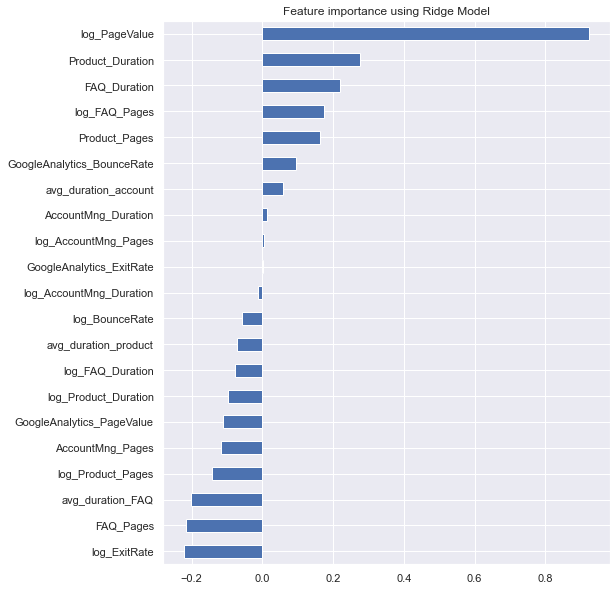

In [131]:
plot_importance(ridge_coefs,'Ridge')

<hr>
<a class="anchor" id="imbalanced">
    
# Check for an imbalanced dataset
    
</a>

<hr>
<a class="anchor" id="Adaptive">
    
## Adaptive Syntetic Oversampling 
    
</a>

In [82]:
#y_train_s=y_train_df.squeeze()

In [87]:
y_train_df.value_counts()

Buy
0      5698
1      1010
dtype: int64

In [88]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [89]:
X_train_eng=X_train_eng.drop(non_num_feat,axis=1)
X_val_eng=X_val_eng.drop(non_num_feat,axis=1)

In [90]:
non_num_feat

['Date',
 'OS',
 'Country',
 'Type_of_Traffic',
 'Type_of_Visitor',
 'day',
 'Browser']

In [91]:
from imblearn.over_sampling import ADASYN

# define pipeline
adasyn = ADASYN(sampling_strategy='minority', random_state=0, n_neighbors=5)
X_train_over, y_train_over = adasyn.fit_resample(X_train_eng, y_train_no_out.to_list())

In [92]:
count1=0
count0=0

for value in y_train_over:
    if value==1:
        count1+=1
    else: count0+=1
        
print(count1,count0)

5693 5698


In [93]:
set1=['AccountMng_Pages','Product_Duration','log_PageValue','x3_New_Access','traffic_2','during_covid']
set2=['AccountMng_Pages','Product_Duration','log_PageValue','x3_New_Access','traffic_2','during_covid','GoogleAnalytics_ExitRate','log_FAQ_Pages']
set3=['AccountMng_Pages','Product_Duration','log_PageValue','x2_MacOSX','x2_Windows','during_covid','GoogleAnalytics_ExitRate','log_FAQ_Pages']

X_train_over y_train_over; X_val_eng y_val_df

X_train_eng y_train_df; X_val_eng y_val_df